In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('full_grouped.csv')

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


         Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa  
Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Regio

In [21]:
# Define countries of interest
countries = ['Kenya', 'United States', 'India']

# Filter the DataFrame
df_filtered = df[df['Country/Region'].isin(countries)]

# Display the filtered result
print(df_filtered.head())

           Date Country/Region  Confirmed  Deaths  Recovered  Active  \
79   2020-01-22          India          0       0          0       0   
90   2020-01-22          Kenya          0       0          0       0   
266  2020-01-23          India          0       0          0       0   
277  2020-01-23          Kenya          0       0          0       0   
453  2020-01-24          India          0       0          0       0   

     New cases  New deaths  New recovered       WHO Region  
79           0           0              0  South-East Asia  
90           0           0              0           Africa  
266          0           0              0  South-East Asia  
277          0           0              0           Africa  
453          0           0              0  South-East Asia  


In [22]:
df.isnull().sum()


Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [24]:
# Convert the date column
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Sort values (just in case)
df_filtered = df_filtered.sort_values(by=['Country/Region', 'Date'])

# Fill missing values (forward fill is safe for cumulative data)
#df_filtered.fillna(method='ffill', inplace=True)


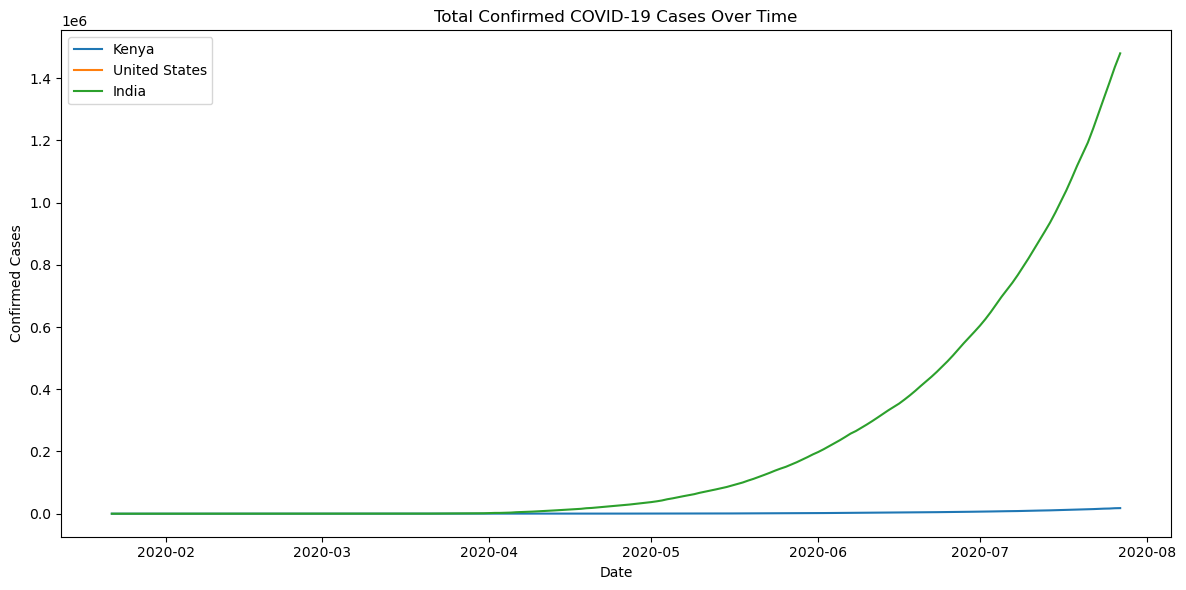

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)

plt.title('Total Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.tight_layout()
plt.show()


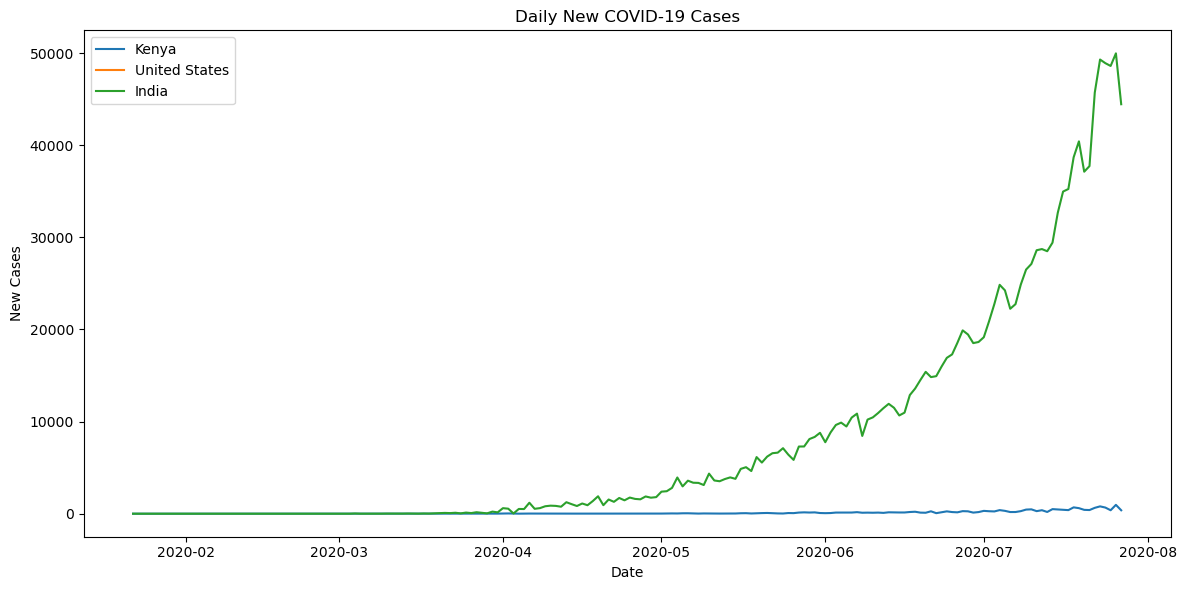

In [26]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['New cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()


In [27]:
df_filtered['Death Rate'] = df_filtered['Deaths'] / df_filtered['Confirmed']

# Optional: Average death rate by country
df_filtered.groupby('Country/Region')['Death Rate'].mean()


Country/Region
India    0.021935
Kenya    0.030067
Name: Death Rate, dtype: float64

Enter a country (Kenya, India, United States):  Kenya
Enter start date (YYYY-MM-DD):  2020-01-22
Enter end date (YYYY-MM-DD):  2021-01-22


<Axes: title={'center': 'COVID-19 Confirmed Cases in Kenya'}, xlabel='Date'>

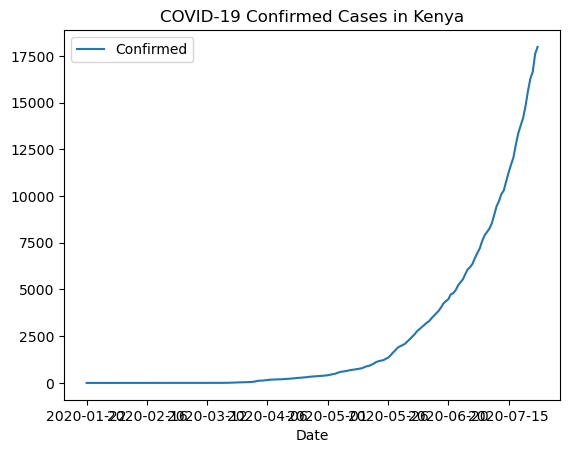

In [28]:
# Example using input()
user_country = input("Enter a country (Kenya, India, United States): ")
user_start = input("Enter start date (YYYY-MM-DD): ")
user_end = input("Enter end date (YYYY-MM-DD): ")

user_df = df[(df['Country/Region'] == user_country) & 
             (df['Date'] >= user_start) & 
             (df['Date'] <= user_end)]

user_df.plot(x='Date', y='Confirmed', title=f'COVID-19 Confirmed Cases in {user_country}')
